## Task 1:
### 1.	Extract reviews of any product from e-commerce website Amazon.
### 2.	Perform sentiment analysis on this extracted data and build a unigram and bigram word cloud. 


In [1]:
#importing requests to ectract content form url
import requests
#beautifulsoup is for web scrapping it is used for scrap specific content
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#creating empty review list
firebolt_review =[]
for i in range(1,21):
    ip=[]
    url='https://www.amazon.in/Fire-Boltt-Bluetooth-Assistance-Calculator-Monitoring/product-reviews/B0B3MYTGZD/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    response= requests.get(url)
    soup = bs(response.content,'html.parser')# creating soup object to iterate over the extracted content
    reviews = soup.find_all("span", attrs = {"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags
    
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    firebolt_review = firebolt_review + ip   # adding the reviews of one page to empty list which in future contains all the reviews


In [3]:
#writing reviews in a text file
with open('firebolt.txt','w', encoding='utf8') as output:
    output.write(str(firebolt_review))

In [4]:
#join all the review into single paragraph
ip_rev_string = ' '.join(firebolt_review)
ip_rev_string

"\nWith this features seems worth for the money. But strap which provided along with smart watch the brass part is dull and  looks old.\n \nGreat product , I received a scarech product but love it and I keep it . But please next time I hope brand new\n \nThe overall experience is really good and the features are really very interesting overall is a very good product\n \nThe product is great for its accessories. But the battery life is too low.\n \nGood looking smart watch.Battery  backup is 7days.Accurate sensor.Overall all good.\n \nI like this product good sleep tracking, and touch screen accuracy.\n \nIt's not working after some day . But watch Is ok\n \nThe display is good and have a lot of features\n \nIt is awesome look, working condition have to check but looking so awesome 😎\n \nLooks -5/5Touch 4/5Battery 4/5Performance 4/5A must buy for 2500 rs\n \nTouch is little bit slow. And voice call noise not much clear but ok. More reviews will provide after the use\n \nIt's a nice prod

In [5]:
import nltk
from nltk.corpus import stopwords
#remving unwanted symbols in case exists
ip_rev_string = re.sub("[^A-Za-z" "]+", " ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [6]:
# Words that are contained in the reviews
ip_reviews_words = ip_rev_string.split(" ")
ip_reviews_words

['',
 'with',
 'this',
 'features',
 'seems',
 'worth',
 'for',
 'the',
 'money',
 'but',
 'strap',
 'which',
 'provided',
 'along',
 'with',
 'smart',
 'watch',
 'the',
 'brass',
 'part',
 'is',
 'dull',
 'and',
 'looks',
 'old',
 'great',
 'product',
 'i',
 'received',
 'a',
 'scarech',
 'product',
 'but',
 'love',
 'it',
 'and',
 'i',
 'keep',
 'it',
 'but',
 'please',
 'next',
 'time',
 'i',
 'hope',
 'brand',
 'new',
 'the',
 'overall',
 'experience',
 'is',
 'really',
 'good',
 'and',
 'the',
 'features',
 'are',
 'really',
 'very',
 'interesting',
 'overall',
 'is',
 'a',
 'very',
 'good',
 'product',
 'the',
 'product',
 'is',
 'great',
 'for',
 'its',
 'accessories',
 'but',
 'the',
 'battery',
 'life',
 'is',
 'too',
 'low',
 'good',
 'looking',
 'smart',
 'watch',
 'battery',
 'backup',
 'is',
 'days',
 'accurate',
 'sensor',
 'overall',
 'all',
 'good',
 'i',
 'like',
 'this',
 'product',
 'good',
 'sleep',
 'tracking',
 'and',
 'touch',
 'screen',
 'accuracy',
 'it',
 's',

In [7]:
ip_reviews_words = ip_reviews_words[1:]
ip_reviews_words

['with',
 'this',
 'features',
 'seems',
 'worth',
 'for',
 'the',
 'money',
 'but',
 'strap',
 'which',
 'provided',
 'along',
 'with',
 'smart',
 'watch',
 'the',
 'brass',
 'part',
 'is',
 'dull',
 'and',
 'looks',
 'old',
 'great',
 'product',
 'i',
 'received',
 'a',
 'scarech',
 'product',
 'but',
 'love',
 'it',
 'and',
 'i',
 'keep',
 'it',
 'but',
 'please',
 'next',
 'time',
 'i',
 'hope',
 'brand',
 'new',
 'the',
 'overall',
 'experience',
 'is',
 'really',
 'good',
 'and',
 'the',
 'features',
 'are',
 'really',
 'very',
 'interesting',
 'overall',
 'is',
 'a',
 'very',
 'good',
 'product',
 'the',
 'product',
 'is',
 'great',
 'for',
 'its',
 'accessories',
 'but',
 'the',
 'battery',
 'life',
 'is',
 'too',
 'low',
 'good',
 'looking',
 'smart',
 'watch',
 'battery',
 'backup',
 'is',
 'days',
 'accurate',
 'sensor',
 'overall',
 'all',
 'good',
 'i',
 'like',
 'this',
 'product',
 'good',
 'sleep',
 'tracking',
 'and',
 'touch',
 'screen',
 'accuracy',
 'it',
 's',
 'no

In [8]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf = True, ngram_range = (1, 1))
X = vectorizer.fit_transform(ip_reviews_words)

In [9]:
with open("D:\stopwords.txt",'r')as sw:
    stop_words = sw.read()

In [10]:
stop_words = stop_words.split('\n')
stop_words

['#',
 '#  stopwords.txt',
 '#',
 '#  Freely available stopword list, balancing coverage and size.',
 '#',
 '#  From http://www.lextek.com/manuals/onix/stopwords1.html',
 'a',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'down',
 'downed',
 'downing',
 'downs',
 'duri

In [11]:
stop_words.extend(["Fire-Boltt", "Ring 3", "time", "Bluetooth", "watch", "device", "product", "day"])

In [12]:
ip_reviews_words = [i for i in ip_reviews_words if not i in stop_words]
ip_reviews_words

['features',
 'worth',
 'money',
 'strap',
 'provided',
 'smart',
 'brass',
 'dull',
 'looks',
 'received',
 'scarech',
 'love',
 'please',
 'hope',
 'brand',
 'overall',
 'experience',
 'features',
 'overall',
 'accessories',
 'battery',
 'life',
 'low',
 'looking',
 'smart',
 'battery',
 'backup',
 'days',
 'accurate',
 'sensor',
 'overall',
 'sleep',
 'tracking',
 'touch',
 'screen',
 'accuracy',
 'ok',
 'display',
 'lot',
 'features',
 'awesome',
 'look',
 'condition',
 'check',
 'looking',
 'awesome',
 'looks',
 'touch',
 'battery',
 'performance',
 'buy',
 'rs',
 'touch',
 'little',
 'bit',
 'slow',
 'voice',
 'call',
 'noise',
 'ok',
 'reviews',
 'provide',
 'nice',
 'easy',
 'price',
 'design',
 'wise',
 'beautiful',
 'awesome',
 'using',
 'month',
 'features',
 'connectivity',
 'phone',
 'okay',
 'money',
 'nice',
 'price',
 'range',
 'recieved',
 'rotating',
 'crown',
 'isn',
 'move',
 'accuracy',
 'fine',
 'accurate',
 'amazing',
 'accuracy',
 'recommended',
 'boys',
 'girls

In [13]:
# Joining all the reviews into single paragraph 
ip_rev_string = ' '.join(ip_reviews_words)
ip_rev_string

'features worth money strap provided smart brass dull looks received scarech love please hope brand overall experience features overall accessories battery life low looking smart battery backup days accurate sensor overall sleep tracking touch screen accuracy ok display lot features awesome look condition check looking awesome looks touch battery performance buy rs touch little bit slow voice call noise ok reviews provide nice easy price design wise beautiful awesome using month features connectivity phone okay money nice price range recieved rotating crown isn move accuracy fine accurate amazing accuracy recommended boys girls bought sale bought looks screen comes am disappointed app comes severe lack customisation option doesn optimum satisfaction basic fancy comes calculator alarm flash music player preloaded games apart heart oxygen sleep step tracking dwell feel battery backup reported reviews true ordinary usage lasts maximum days play songs constant bluetooth days am complaining

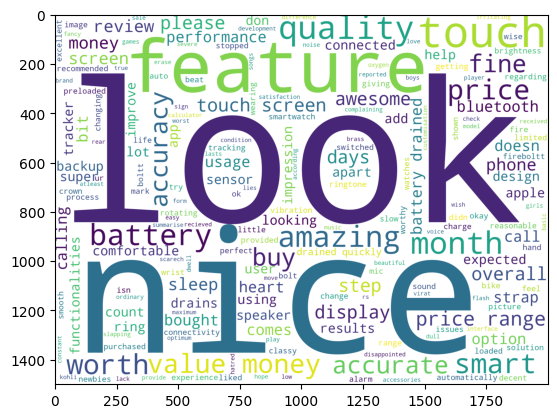

In [14]:
# WordCloud can be performed on the string inputs. Corpus level word cloud
wordcloud_ip = WordCloud(background_color='white', height=1500,width=2000).generate(ip_rev_string)
plt.imshow(wordcloud_ip)

In [15]:
# Positive words 
with open("D:\positive-words.txt",'r')as pos:
    positive = pos.read().split('\n')

In [16]:
positive

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [17]:
# Positive word cloud Choosing only words which are present in positive words
ip_pos_in_pos = ' '.join([i for i in ip_reviews_words if i in positive])

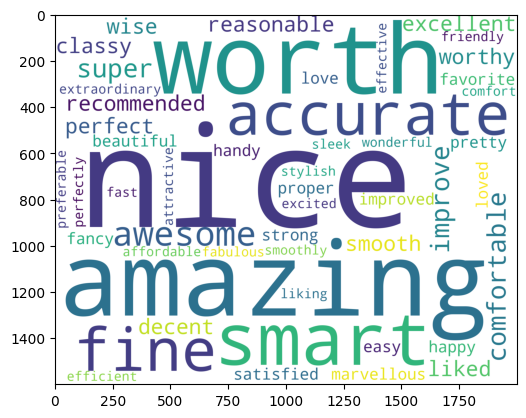

In [18]:
wordcloud_pos_in_Pos= WordCloud(background_color='white',width=2000,height=1600).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_Pos)

In [19]:
# Negative word cloud
with open(r"D:\negative-words.txt")as neg:
    negative = neg.read().split('\n')

In [20]:
negative

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [21]:
ip_neg_pos = ' '.join([i for i in ip_reviews_words if i in negative])

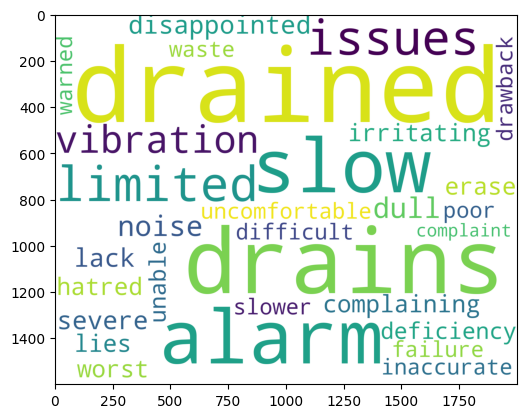

In [22]:
wordcloud_neg_in_neg = WordCloud(background_color='white',width=2000,height=1600).generate(ip_neg_pos)
plt.figure(2)
plt.imshow(wordcloud_neg_in_neg)

In [23]:
#joining all the review into single paragraph
ip_rev_string = ' '.join(firebolt_review)
ip_rev_string

"\nWith this features seems worth for the money. But strap which provided along with smart watch the brass part is dull and  looks old.\n \nGreat product , I received a scarech product but love it and I keep it . But please next time I hope brand new\n \nThe overall experience is really good and the features are really very interesting overall is a very good product\n \nThe product is great for its accessories. But the battery life is too low.\n \nGood looking smart watch.Battery  backup is 7days.Accurate sensor.Overall all good.\n \nI like this product good sleep tracking, and touch screen accuracy.\n \nIt's not working after some day . But watch Is ok\n \nThe display is good and have a lot of features\n \nIt is awesome look, working condition have to check but looking so awesome 😎\n \nLooks -5/5Touch 4/5Battery 4/5Performance 4/5A must buy for 2500 rs\n \nTouch is little bit slow. And voice call noise not much clear but ok. More reviews will provide after the use\n \nIt's a nice prod

In [24]:
#wordcloud with bigram
from wordcloud import STOPWORDS,WordCloud

In [25]:
WNL = nltk.WordNetLemmatizer()

#lower case and tokemize
text = ip_rev_string.lower()
text

"\nwith this features seems worth for the money. but strap which provided along with smart watch the brass part is dull and  looks old.\n \ngreat product , i received a scarech product but love it and i keep it . but please next time i hope brand new\n \nthe overall experience is really good and the features are really very interesting overall is a very good product\n \nthe product is great for its accessories. but the battery life is too low.\n \ngood looking smart watch.battery  backup is 7days.accurate sensor.overall all good.\n \ni like this product good sleep tracking, and touch screen accuracy.\n \nit's not working after some day . but watch is ok\n \nthe display is good and have a lot of features\n \nit is awesome look, working condition have to check but looking so awesome 😎\n \nlooks -5/5touch 4/5battery 4/5performance 4/5a must buy for 2500 rs\n \ntouch is little bit slow. and voice call noise not much clear but ok. more reviews will provide after the use\n \nit's a nice prod

In [26]:
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'","")
text

'\nwith this features seems worth for the money. but strap which provided along with smart watch the brass part is dull and  looks old.\n \ngreat product , i received a scarech product but love it and i keep it . but please next time i hope brand new\n \nthe overall experience is really good and the features are really very interesting overall is a very good product\n \nthe product is great for its accessories. but the battery life is too low.\n \ngood looking smart watch.battery  backup is 7days.accurate sensor.overall all good.\n \ni like this product good sleep tracking, and touch screen accuracy.\n \nits not working after some day . but watch is ok\n \nthe display is good and have a lot of features\n \nit is awesome look, working condition have to check but looking so awesome 😎\n \nlooks -5/5touch 4/5battery 4/5performance 4/5a must buy for 2500 rs\n \ntouch is little bit slow. and voice call noise not much clear but ok. more reviews will provide after the use\n \nits a nice produc

In [27]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)
text1

<Text: with this features seems worth for the money...>

In [28]:
# Remove extra chars as well as stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

In [29]:
#create a list of stopwords
stop_words_wc = set(STOPWORDS)
customised_words = ['price', 'Ring 3']

In [31]:
new_stopwords = stop_words_wc.union(customised_words)
print(new_stopwords)

{'Ring 3',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought'

In [32]:
#remove stopwords
text_content= [i for i in text_content if i not in new_stopwords]
print(text_content)

['features',
 'seems',
 'worth',
 'money',
 '',
 'strap',
 'provided',
 'along',
 'smart',
 'watch',
 'brass',
 'part',
 'dull',
 'looks',
 'old',
 '',
 'great',
 'product',
 '',
 'received',
 'scarech',
 'product',
 'love',
 'keep',
 '',
 'please',
 'next',
 'time',
 'hope',
 'brand',
 'new',
 'overall',
 'experience',
 'really',
 'good',
 'features',
 'really',
 'interesting',
 'overall',
 'good',
 'product',
 'product',
 'great',
 'accessories',
 '',
 'battery',
 'life',
 'low',
 '',
 'good',
 'looking',
 'smart',
 'watchbattery',
 'backup',
 '7daysaccurate',
 'sensoroverall',
 'good',
 '',
 'product',
 'good',
 'sleep',
 'tracking',
 '',
 'touch',
 'screen',
 'accuracy',
 '',
 'working',
 'day',
 '',
 'watch',
 'ok',
 'display',
 'good',
 'lot',
 'features',
 'awesome',
 'look',
 '',
 'working',
 'condition',
 'check',
 'looking',
 'awesome',
 '😎',
 'looks',
 '5/5touch',
 '4/5battery',
 '4/5performance',
 '4/5a',
 'must',
 'buy',
 '2500',
 'rs',
 'touch',
 'little',
 'bit',
 'slow'

In [33]:
# Take only non-empty entries
text_content =[i for i in text_content if len(i) != 0]
print(text_content)

['features',
 'seems',
 'worth',
 'money',
 'strap',
 'provided',
 'along',
 'smart',
 'watch',
 'brass',
 'part',
 'dull',
 'looks',
 'old',
 'great',
 'product',
 'received',
 'scarech',
 'product',
 'love',
 'keep',
 'please',
 'next',
 'time',
 'hope',
 'brand',
 'new',
 'overall',
 'experience',
 'really',
 'good',
 'features',
 'really',
 'interesting',
 'overall',
 'good',
 'product',
 'product',
 'great',
 'accessories',
 'battery',
 'life',
 'low',
 'good',
 'looking',
 'smart',
 'watchbattery',
 'backup',
 '7daysaccurate',
 'sensoroverall',
 'good',
 'product',
 'good',
 'sleep',
 'tracking',
 'touch',
 'screen',
 'accuracy',
 'working',
 'day',
 'watch',
 'ok',
 'display',
 'good',
 'lot',
 'features',
 'awesome',
 'look',
 'working',
 'condition',
 'check',
 'looking',
 'awesome',
 '😎',
 'looks',
 '5/5touch',
 '4/5battery',
 '4/5performance',
 '4/5a',
 'must',
 'buy',
 '2500',
 'rs',
 'touch',
 'little',
 'bit',
 'slow',
 'voice',
 'call',
 'noise',
 'much',
 'clear',
 'ok'

In [34]:
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]
print(text_content)

['feature',
 'seems',
 'worth',
 'money',
 'strap',
 'provided',
 'along',
 'smart',
 'watch',
 'brass',
 'part',
 'dull',
 'look',
 'old',
 'great',
 'product',
 'received',
 'scarech',
 'product',
 'love',
 'keep',
 'please',
 'next',
 'time',
 'hope',
 'brand',
 'new',
 'overall',
 'experience',
 'really',
 'good',
 'feature',
 'really',
 'interesting',
 'overall',
 'good',
 'product',
 'product',
 'great',
 'accessory',
 'battery',
 'life',
 'low',
 'good',
 'looking',
 'smart',
 'watchbattery',
 'backup',
 '7daysaccurate',
 'sensoroverall',
 'good',
 'product',
 'good',
 'sleep',
 'tracking',
 'touch',
 'screen',
 'accuracy',
 'working',
 'day',
 'watch',
 'ok',
 'display',
 'good',
 'lot',
 'feature',
 'awesome',
 'look',
 'working',
 'condition',
 'check',
 'looking',
 'awesome',
 '😎',
 'look',
 '5/5touch',
 '4/5battery',
 '4/5performance',
 '4/5a',
 'must',
 'buy',
 '2500',
 'r',
 'touch',
 'little',
 'bit',
 'slow',
 'voice',
 'call',
 'noise',
 'much',
 'clear',
 'ok',
 'revi

In [37]:
nltk_tokens = nltk.word_tokenize(text) 
print(nltk_tokens)

['with', 'this', 'features', 'seems', 'worth', 'for', 'the', 'money', '.', 'but', 'strap', 'which', 'provided', 'along', 'with', 'smart', 'watch', 'the', 'brass', 'part', 'is', 'dull', 'and', 'looks', 'old', '.', 'great', 'product', ',', 'i', 'received', 'a', 'scarech', 'product', 'but', 'love', 'it', 'and', 'i', 'keep', 'it', '.', 'but', 'please', 'next', 'time', 'i', 'hope', 'brand', 'new', 'the', 'overall', 'experience', 'is', 'really', 'good', 'and', 'the', 'features', 'are', 'really', 'very', 'interesting', 'overall', 'is', 'a', 'very', 'good', 'product', 'the', 'product', 'is', 'great', 'for', 'its', 'accessories', '.', 'but', 'the', 'battery', 'life', 'is', 'too', 'low', '.', 'good', 'looking', 'smart', 'watch.battery', 'backup', 'is', '7days.accurate', 'sensor.overall', 'all', 'good', '.', 'i', 'like', 'this', 'product', 'good', 'sleep', 'tracking', ',', 'and', 'touch', 'screen', 'accuracy', '.', 'its', 'not', 'working', 'after', 'some', 'day', '.', 'but', 'watch', 'is', 'ok', 

In [36]:
bigram_list = list(nltk.bigrams(text_content))
print(bigram_list)

[('feature', 'seems'), ('seems', 'worth'), ('worth', 'money'), ('money', 'strap'), ('strap', 'provided'), ('provided', 'along'), ('along', 'smart'), ('smart', 'watch'), ('watch', 'brass'), ('brass', 'part'), ('part', 'dull'), ('dull', 'look'), ('look', 'old'), ('old', 'great'), ('great', 'product'), ('product', 'received'), ('received', 'scarech'), ('scarech', 'product'), ('product', 'love'), ('love', 'keep'), ('keep', 'please'), ('please', 'next'), ('next', 'time'), ('time', 'hope'), ('hope', 'brand'), ('brand', 'new'), ('new', 'overall'), ('overall', 'experience'), ('experience', 'really'), ('really', 'good'), ('good', 'feature'), ('feature', 'really'), ('really', 'interesting'), ('interesting', 'overall'), ('overall', 'good'), ('good', 'product'), ('product', 'product'), ('product', 'great'), ('great', 'accessory'), ('accessory', 'battery'), ('battery', 'life'), ('life', 'low'), ('low', 'good'), ('good', 'looking'), ('looking', 'smart'), ('smart', 'watchbattery'), ('watchbattery', '

In [38]:
dictionary2 = [' '.join(tup) for tup in bigram_list]
print(dictionary2)

['feature seems', 'seems worth', 'worth money', 'money strap', 'strap provided', 'provided along', 'along smart', 'smart watch', 'watch brass', 'brass part', 'part dull', 'dull look', 'look old', 'old great', 'great product', 'product received', 'received scarech', 'scarech product', 'product love', 'love keep', 'keep please', 'please next', 'next time', 'time hope', 'hope brand', 'brand new', 'new overall', 'overall experience', 'experience really', 'really good', 'good feature', 'feature really', 'really interesting', 'interesting overall', 'overall good', 'good product', 'product product', 'product great', 'great accessory', 'accessory battery', 'battery life', 'life low', 'low good', 'good looking', 'looking smart', 'smart watchbattery', 'watchbattery backup', 'backup 7daysaccurate', '7daysaccurate sensoroverall', 'sensoroverall good', 'good product', 'product good', 'good sleep', 'sleep tracking', 'tracking touch', 'touch screen', 'screen accuracy', 'accuracy working', 'working da

In [39]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'feature seems': 277,
 'seems worth': 738,
 'worth money': 954,
 'money strap': 492,
 'strap provided': 789,
 'provided along': 657,
 'along smart': 30,
 'smart watch': 763,
 'watch brass': 883,
 'brass part': 119,
 'part dull': 563,
 'dull look': 223,
 'look old': 442,
 'old great': 542,
 'great product': 368,
 'product received': 646,
 'received scarech': 703,
 'scarech product': 727,
 'product love': 634,
 'love keep': 457,
 'keep please': 410,
 'please next': 594,
 'next time': 519,
 'time hope': 811,
 'hope brand': 384,
 'brand new': 118,
 'new overall': 516,
 'overall experience': 556,
 'experience really': 249,
 'really good': 695,
 'good feature': 335,
 'feature really': 276,
 'really interesting': 697,
 'interesting overall': 399,
 'overall good': 558,
 'good product': 349,
 'product product': 640,
 'product great': 630,
 'great accessory': 366,
 'accessory battery': 11,
 'battery life': 79,
 'life low': 420,
 'low good': 459,
 'good looking': 340,
 'looking smart': 453,
 'sm

In [40]:
sum_words = bag_of_words.sum(axis=0)
words_freq =[(word, sum_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key= lambda x:x[1], reverse=True)
print(words_freq[:100])

[('good product', 21), ('watch good', 10), ('good watch', 8), ('value money', 8), ('product good', 6), ('nice watch', 6), ('smart watch', 5), ('touch screen', 5), ('nice product', 5), ('product range', 5), ('look good', 5), ('everything fine', 4), ('worth money', 3), ('great product', 3), ('good feature', 3), ('using watch', 3), ('screen good', 3), ('watch face', 3), ('good nice', 3), ('better nice', 3), ('battery drained', 3), ('drained quickly', 3), ('accurate result', 3), ('really good', 2), ('good looking', 2), ('good sleep', 2), ('must buy', 2), ('bit slow', 2), ('good good', 2), ('good awesome', 2), ('watch month', 2), ('month really', 2), ('really great', 2), ('great feature', 2), ('feature working', 2), ('working quite', 2), ('quite well', 2), ('well connectivity', 2), ('connectivity phone', 2), ('rotating crown', 2), ('product amazing', 2), ('battery backup', 2), ('watch worked', 2), ('fire boltt', 2), ('comfortable watch', 2), ('watch worth', 2), ('stopped working', 2), ('goo

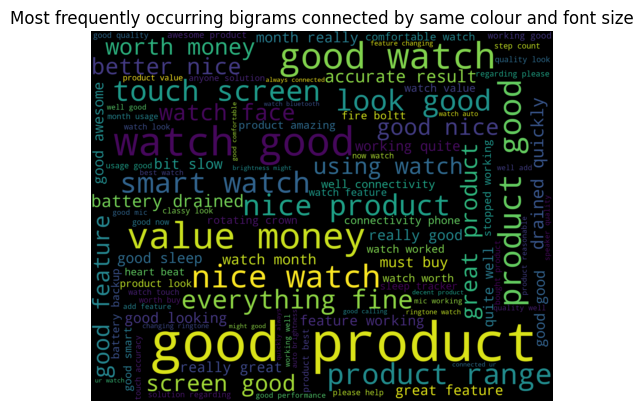

In [41]:
#generating a word cloud
word_dict = dict(words_freq)
word_cloud = WordCloud(max_words=100, width=2000,height=1600,stopwords=new_stopwords).generate_from_frequencies(word_dict)
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Task 2:
## 1.	Extract reviews for any movie from IMDB and perform sentiment analysis.


In [85]:
#importing requests to ectract content form url
import requests
#beautifulsoup is for web scrapping it is used for scrap specific content
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [86]:
#creating empty review list
Thunivu_review =[]
for i in range(1,21):
    ip=[]
    url='https://m.imdb.com/title/tt15163652/reviews/?ref_=tt_ov_rt'+str(i)
    response= requests.get(url)
    soup = bs(response.content,'html.parser')# creating soup object to iterate over the extracted content
    reviews = soup.find_all("div", attrs = {"class","text"})# Extracting the content under specific tags
    
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    Thunivu_review = Thunivu_review + ip   # adding the reviews of one page to empty list which in future contains all the reviews


In [105]:
with open('thunivu.txt','w',encoding='utf8') as output:
    output.write(str(Thunivu_review))

In [106]:
Thunivu_review

['Thunivu- Well crafted heist thriller with a rooted plot that shakes the public and provides deep insights into what exactly the bank does for common society.Ajith owns the complete movie with his swag, dance moves, dialogue delivery and fights. He up-levels the plot to the next level, and masks somehow the immature editing and few silly scenes.Vinoth as the director has chosen the right script and educates the audience with awareness.He exposes the real truth tactfully with twists and turns. Wish the screenplay was bit tight with crisp editing in the second half.Thunivu strikes the right cord otherwise!',
 'The screenplay was very fast which is satisfying for the present Tamil audiance.thala presence was interesting and the twist was mostly unpredictable. Vinoth is not just another filmmaker he is a man who really has a concern on the people for who he makes films without just telling a fictional / non fictional story he tries to bring in a thing which each and everyone watching his 

In [107]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(Thunivu_review)
ip_rev_string

'Thunivu- Well crafted heist thriller with a rooted plot that shakes the public and provides deep insights into what exactly the bank does for common society.Ajith owns the complete movie with his swag, dance moves, dialogue delivery and fights. He up-levels the plot to the next level, and masks somehow the immature editing and few silly scenes.Vinoth as the director has chosen the right script and educates the audience with awareness.He exposes the real truth tactfully with twists and turns. Wish the screenplay was bit tight with crisp editing in the second half.Thunivu strikes the right cord otherwise! The screenplay was very fast which is satisfying for the present Tamil audiance.thala presence was interesting and the twist was mostly unpredictable. Vinoth is not just another filmmaker he is a man who really has a concern on the people for who he makes films without just telling a fictional / non fictional story he tries to bring in a thing which each and everyone watching his film 

In [108]:
import nltk
from nltk.corpus import stopwords

In [109]:
# Removing unwanted symbols incase they exists
ip_rev_string = re.sub("[^A-Za-z" "]+", " ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [110]:
ip_review_words = ip_rev_string.split(' ')
print(ip_review_words)

['thunivu', 'well', 'crafted', 'heist', 'thriller', 'with', 'a', 'rooted', 'plot', 'that', 'shakes', 'the', 'public', 'and', 'provides', 'deep', 'insights', 'into', 'what', 'exactly', 'the', 'bank', 'does', 'for', 'common', 'society', 'ajith', 'owns', 'the', 'complete', 'movie', 'with', 'his', 'swag', 'dance', 'moves', 'dialogue', 'delivery', 'and', 'fights', 'he', 'up', 'levels', 'the', 'plot', 'to', 'the', 'next', 'level', 'and', 'masks', 'somehow', 'the', 'immature', 'editing', 'and', 'few', 'silly', 'scenes', 'vinoth', 'as', 'the', 'director', 'has', 'chosen', 'the', 'right', 'script', 'and', 'educates', 'the', 'audience', 'with', 'awareness', 'he', 'exposes', 'the', 'real', 'truth', 'tactfully', 'with', 'twists', 'and', 'turns', 'wish', 'the', 'screenplay', 'was', 'bit', 'tight', 'with', 'crisp', 'editing', 'in', 'the', 'second', 'half', 'thunivu', 'strikes', 'the', 'right', 'cord', 'otherwise', 'the', 'screenplay', 'was', 'very', 'fast', 'which', 'is', 'satisfying', 'for', 'the',

In [111]:
ip_review_words = ip_review_words[1:]
print(ip_review_words)

['well', 'crafted', 'heist', 'thriller', 'with', 'a', 'rooted', 'plot', 'that', 'shakes', 'the', 'public', 'and', 'provides', 'deep', 'insights', 'into', 'what', 'exactly', 'the', 'bank', 'does', 'for', 'common', 'society', 'ajith', 'owns', 'the', 'complete', 'movie', 'with', 'his', 'swag', 'dance', 'moves', 'dialogue', 'delivery', 'and', 'fights', 'he', 'up', 'levels', 'the', 'plot', 'to', 'the', 'next', 'level', 'and', 'masks', 'somehow', 'the', 'immature', 'editing', 'and', 'few', 'silly', 'scenes', 'vinoth', 'as', 'the', 'director', 'has', 'chosen', 'the', 'right', 'script', 'and', 'educates', 'the', 'audience', 'with', 'awareness', 'he', 'exposes', 'the', 'real', 'truth', 'tactfully', 'with', 'twists', 'and', 'turns', 'wish', 'the', 'screenplay', 'was', 'bit', 'tight', 'with', 'crisp', 'editing', 'in', 'the', 'second', 'half', 'thunivu', 'strikes', 'the', 'right', 'cord', 'otherwise', 'the', 'screenplay', 'was', 'very', 'fast', 'which', 'is', 'satisfying', 'for', 'the', 'present',

In [112]:
#tfidf vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,1))
X=vectorizer.fit_transform(ip_review_words)

In [113]:
# Joining all the reviews into single paragraph 
ip_rev_string = ' '.join(Thunivu_review)
print(ip_rev_string)

Thunivu- Well crafted heist thriller with a rooted plot that shakes the public and provides deep insights into what exactly the bank does for common society.Ajith owns the complete movie with his swag, dance moves, dialogue delivery and fights. He up-levels the plot to the next level, and masks somehow the immature editing and few silly scenes.Vinoth as the director has chosen the right script and educates the audience with awareness.He exposes the real truth tactfully with twists and turns. Wish the screenplay was bit tight with crisp editing in the second half.Thunivu strikes the right cord otherwise! The screenplay was very fast which is satisfying for the present Tamil audiance.thala presence was interesting and the twist was mostly unpredictable. Vinoth is not just another filmmaker he is a man who really has a concern on the people for who he makes films without just telling a fictional / non fictional story he tries to bring in a thing which each and everyone watching his film w

In [96]:
# Wordcloud with bigram
from wordcloud import wordcloud, STOPWORDS

In [97]:
WNL = nltk.WordNetLemmatizer()

#lowercase
text = ip_rev_string.lower()
print(text)

thunivu- well crafted heist thriller with a rooted plot that shakes the public and provides deep insights into what exactly the bank does for common society.ajith owns the complete movie with his swag, dance moves, dialogue delivery and fights. he up-levels the plot to the next level, and masks somehow the immature editing and few silly scenes.vinoth as the director has chosen the right script and educates the audience with awareness.he exposes the real truth tactfully with twists and turns. wish the screenplay was bit tight with crisp editing in the second half.thunivu strikes the right cord otherwise! the screenplay was very fast which is satisfying for the present tamil audiance.thala presence was interesting and the twist was mostly unpredictable. vinoth is not just another filmmaker he is a man who really has a concern on the people for who he makes films without just telling a fictional / non fictional story he tries to bring in a thing which each and everyone watching his film w

In [98]:
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
print(text)

thunivu- well crafted heist thriller with a rooted plot that shakes the public and provides deep insights into what exactly the bank does for common society.ajith owns the complete movie with his swag, dance moves, dialogue delivery and fights. he up-levels the plot to the next level, and masks somehow the immature editing and few silly scenes.vinoth as the director has chosen the right script and educates the audience with awareness.he exposes the real truth tactfully with twists and turns. wish the screenplay was bit tight with crisp editing in the second half.thunivu strikes the right cord otherwise! the screenplay was very fast which is satisfying for the present tamil audiance.thala presence was interesting and the twist was mostly unpredictable. vinoth is not just another filmmaker he is a man who really has a concern on the people for who he makes films without just telling a fictional / non fictional story he tries to bring in a thing which each and everyone watching his film w

In [99]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)
print(text1)

<Text: thunivu- well crafted heist thriller with a rooted...>


In [100]:
# Remove extra chars as well as stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

In [103]:
# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['thriller', 'movie', 'thunivu']

In [104]:
new_stopwords = stop_words_wc.union(customised_words)
print(new_stopwords)

{'you', 'few', "she'd", 'to', "when's", 'com', 'i', "they'd", 'all', 'hers', 'what', 'their', 'no', 'it', 'because', 'was', 'own', "you'd", "didn't", "he's", 'whom', 'after', "why's", 'having', 'some', "how's", 'same', "he'd", 'in', 'otherwise', "there's", 'my', "who's", "i'd", 'am', "they're", "they've", 'who', 'ourselves', 'under', 'hence', 'here', 'have', 'themselves', "where's", 'www', 'has', "what's", "she'll", 'where', 'which', 'again', 'she', 'me', 'other', 'below', 'like', "aren't", 'into', "wasn't", "hadn't", 'about', 'get', 'while', "i'm", 'its', "we'd", 'yourself', "i've", 'we', 'being', 'ever', 'therefore', 'against', 'also', 'his', 'and', 'however', 'why', 'they', 'not', 'these', 'them', "weren't", 'ours', 'as', 'nor', 'should', 'your', "won't", "i'll", "isn't", 'so', 'there', 'but', "they'll", "can't", 'thunivu', 'such', 'over', 'does', 'theirs', 'herself', 'since', 'just', 'itself', 'or', 'himself', 'most', 'were', 'did', 'yourselves', 'between', "haven't", "he'll", 'up'

In [115]:
#remove stopwords
text_content = [word for word in text_content if word not in new_stopwords]
print(text_content)

['well', 'crafted', 'heist', 'rooted', 'plot', 'shakes', 'public', 'provides', 'deep', 'insights', 'exactly', 'bank', 'common', 'societyajith', 'owns', 'complete', 'swag', '', 'dance', 'moves', '', 'dialogue', 'delivery', 'fights', '', 'uplevels', 'plot', 'next', 'level', '', 'masks', 'somehow', 'immature', 'editing', 'silly', 'scenesvinoth', 'director', 'chosen', 'right', 'script', 'educates', 'audience', 'awarenesshe', 'exposes', 'real', 'truth', 'tactfully', 'twists', 'turns', '', 'wish', 'screenplay', 'bit', 'tight', 'crisp', 'editing', 'second', 'halfthunivu', 'strikes', 'right', 'cord', '', 'screenplay', 'fast', 'satisfying', 'present', 'tamil', 'audiancethala', 'presence', 'interesting', 'twist', 'mostly', 'unpredictable', '', 'vinoth', 'another', 'filmmaker', 'man', 'really', 'concern', 'people', 'makes', 'films', 'without', 'telling', 'fictional', '/', 'non', 'fictional', 'story', 'tries', 'bring', 'thing', 'everyone', 'watching', 'film', 'will', 'around', 'thier', 'life', 'tr

In [116]:
# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0 ]
print(text_content)

['well', 'crafted', 'heist', 'rooted', 'plot', 'shakes', 'public', 'provides', 'deep', 'insights', 'exactly', 'bank', 'common', 'societyajith', 'owns', 'complete', 'swag', 'dance', 'moves', 'dialogue', 'delivery', 'fights', 'uplevels', 'plot', 'next', 'level', 'masks', 'somehow', 'immature', 'editing', 'silly', 'scenesvinoth', 'director', 'chosen', 'right', 'script', 'educates', 'audience', 'awarenesshe', 'exposes', 'real', 'truth', 'tactfully', 'twists', 'turns', 'wish', 'screenplay', 'bit', 'tight', 'crisp', 'editing', 'second', 'halfthunivu', 'strikes', 'right', 'cord', 'screenplay', 'fast', 'satisfying', 'present', 'tamil', 'audiancethala', 'presence', 'interesting', 'twist', 'mostly', 'unpredictable', 'vinoth', 'another', 'filmmaker', 'man', 'really', 'concern', 'people', 'makes', 'films', 'without', 'telling', 'fictional', '/', 'non', 'fictional', 'story', 'tries', 'bring', 'thing', 'everyone', 'watching', 'film', 'will', 'around', 'thier', 'life', 'tries', 'give', 'us', 'microsc

In [117]:
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]
print(text_content)

['well', 'crafted', 'heist', 'rooted', 'plot', 'shake', 'public', 'provides', 'deep', 'insight', 'exactly', 'bank', 'common', 'societyajith', 'owns', 'complete', 'swag', 'dance', 'move', 'dialogue', 'delivery', 'fight', 'uplevels', 'plot', 'next', 'level', 'mask', 'somehow', 'immature', 'editing', 'silly', 'scenesvinoth', 'director', 'chosen', 'right', 'script', 'educates', 'audience', 'awarenesshe', 'expose', 'real', 'truth', 'tactfully', 'twist', 'turn', 'wish', 'screenplay', 'bit', 'tight', 'crisp', 'editing', 'second', 'halfthunivu', 'strike', 'right', 'cord', 'screenplay', 'fast', 'satisfying', 'present', 'tamil', 'audiancethala', 'presence', 'interesting', 'twist', 'mostly', 'unpredictable', 'vinoth', 'another', 'filmmaker', 'man', 'really', 'concern', 'people', 'make', 'film', 'without', 'telling', 'fictional', '/', 'non', 'fictional', 'story', 'try', 'bring', 'thing', 'everyone', 'watching', 'film', 'will', 'around', 'thier', 'life', 'try', 'give', 'u', 'microscopic', 'view', '

In [118]:
nltk_tokens = nltk.word_tokenize(text)  
print(nltk_tokens)

['thunivu-', 'well', 'crafted', 'heist', 'thriller', 'with', 'a', 'rooted', 'plot', 'that', 'shakes', 'the', 'public', 'and', 'provides', 'deep', 'insights', 'into', 'what', 'exactly', 'the', 'bank', 'does', 'for', 'common', 'society.ajith', 'owns', 'the', 'complete', 'movie', 'with', 'his', 'swag', ',', 'dance', 'moves', ',', 'dialogue', 'delivery', 'and', 'fights', '.', 'he', 'up-levels', 'the', 'plot', 'to', 'the', 'next', 'level', ',', 'and', 'masks', 'somehow', 'the', 'immature', 'editing', 'and', 'few', 'silly', 'scenes.vinoth', 'as', 'the', 'director', 'has', 'chosen', 'the', 'right', 'script', 'and', 'educates', 'the', 'audience', 'with', 'awareness.he', 'exposes', 'the', 'real', 'truth', 'tactfully', 'with', 'twists', 'and', 'turns', '.', 'wish', 'the', 'screenplay', 'was', 'bit', 'tight', 'with', 'crisp', 'editing', 'in', 'the', 'second', 'half.thunivu', 'strikes', 'the', 'right', 'cord', 'otherwise', '!', 'the', 'screenplay', 'was', 'very', 'fast', 'which', 'is', 'satisfying

In [122]:
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('well', 'crafted'), ('crafted', 'heist'), ('heist', 'rooted'), ('rooted', 'plot'), ('plot', 'shake'), ('shake', 'public'), ('public', 'provides'), ('provides', 'deep'), ('deep', 'insight'), ('insight', 'exactly'), ('exactly', 'bank'), ('bank', 'common'), ('common', 'societyajith'), ('societyajith', 'owns'), ('owns', 'complete'), ('complete', 'swag'), ('swag', 'dance'), ('dance', 'move'), ('move', 'dialogue'), ('dialogue', 'delivery'), ('delivery', 'fight'), ('fight', 'uplevels'), ('uplevels', 'plot'), ('plot', 'next'), ('next', 'level'), ('level', 'mask'), ('mask', 'somehow'), ('somehow', 'immature'), ('immature', 'editing'), ('editing', 'silly'), ('silly', 'scenesvinoth'), ('scenesvinoth', 'director'), ('director', 'chosen'), ('chosen', 'right'), ('right', 'script'), ('script', 'educates'), ('educates', 'audience'), ('audience', 'awarenesshe'), ('awarenesshe', 'expose'), ('expose', 'real'), ('real', 'truth'), ('truth', 'tactfully'), ('tactfully', 'twist'), ('twist', 'turn'), ('turn'

In [123]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['well crafted', 'crafted heist', 'heist rooted', 'rooted plot', 'plot shake', 'shake public', 'public provides', 'provides deep', 'deep insight', 'insight exactly', 'exactly bank', 'bank common', 'common societyajith', 'societyajith owns', 'owns complete', 'complete swag', 'swag dance', 'dance move', 'move dialogue', 'dialogue delivery', 'delivery fight', 'fight uplevels', 'uplevels plot', 'plot next', 'next level', 'level mask', 'mask somehow', 'somehow immature', 'immature editing', 'editing silly', 'silly scenesvinoth', 'scenesvinoth director', 'director chosen', 'chosen right', 'right script', 'script educates', 'educates audience', 'audience awarenesshe', 'awarenesshe expose', 'expose real', 'real truth', 'truth tactfully', 'tactfully twist', 'twist turn', 'turn wish', 'wish screenplay', 'screenplay bit', 'bit tight', 'tight crisp', 'crisp editing', 'editing second', 'second halfthunivu', 'halfthunivu strike', 'strike right', 'right cord', 'cord screenplay', 'screenplay fast', 'f

In [124]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'well crafted': 1490,
 'crafted heist': 307,
 'heist rooted': 657,
 'rooted plot': 1099,
 'plot shake': 1007,
 'shake public': 1191,
 'public provides': 1043,
 'provides deep': 1041,
 'deep insight': 330,
 'insight exactly': 699,
 'exactly bank': 438,
 'bank common': 110,
 'common societyajith': 277,
 'societyajith owns': 1230,
 'owns complete': 963,
 'complete swag': 283,
 'swag dance': 1301,
 'dance move': 317,
 'move dialogue': 880,
 'dialogue delivery': 349,
 'delivery fight': 338,
 'fight uplevels': 488,
 'uplevels plot': 1409,
 'plot next': 1006,
 'next level': 921,
 'level mask': 752,
 'mask somehow': 818,
 'somehow immature': 1231,
 'immature editing': 690,
 'editing silly': 387,
 'silly scenesvinoth': 1210,
 'scenesvinoth director': 1137,
 'director chosen': 358,
 'chosen right': 232,
 'right script': 1086,
 'script educates': 1147,
 'educates audience': 388,
 'audience awarenesshe': 86,
 'awarenesshe expose': 98,
 'expose real': 449,
 'real truth': 1058,
 'truth tactfully': 

In [125]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
print(words_freq[:100])

[('first half', 300), ('second half', 280), ('action sequence', 140), ('social message', 100), ('bank robbery', 100), ('even though', 80), ('good social', 80), ('2nd half', 80), ('manju warrier', 80), ('chilla song', 60), ('manju warrior', 60), ('screen presence', 60), ('mass scene', 60), ('one time', 60), ('time watchable', 60), ('1st half', 60), ('half full', 60), ('ak annan', 60), ('bank scam', 60), ('twist turn', 40), ('editing second', 40), ('film will', 40), ('banking financial', 40), ('content oriented', 40), ('chilla chilla', 40), ('overall paisa', 40), ('paisa vasool', 40), ('thala ajith', 40), ('scene real', 40), ('half lot', 40), ('bank issue', 40), ('well written', 40), ('racy screenplay', 40), ('vinoth delivered', 40), ('ajith kumar', 40), ('way climax', 40), ('usual tamil', 40), ('tamil film', 40), ('movies series', 40), ('pace first', 40), ('half mindblowing', 40), ('mindblowing action', 40), ('action layer', 40), ('layer best', 40), ('best recent', 40), ('recent year', 

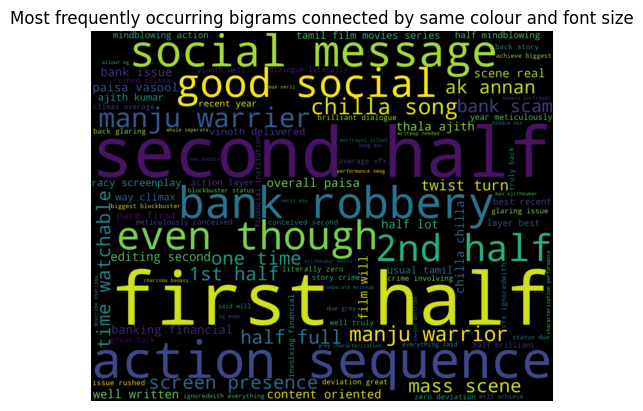

In [126]:
#generating word cloud
word_dict = dict(words_freq)
word_cloud = WordCloud(max_words=100, width=2000,height=1600,stopwords=new_stopwords).generate_from_frequencies(word_dict)
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Task 3: 
## 1.	Choose any other website on the internet and do some research on how to extract text and perform sentiment analysis


In [ ]:
from selenium import webdriver

import warnings
warnings.filterwarnings('ignore')

# below code opens the chrome browser
#download latest version of chromebrowser.exe from https://sites.google.com/a/chromium.org/chromedriver/home
#store downloaded file in C:\\webdrivers
browser = webdriver.Chrome(executable_path="C:\\Program Files\\Google\\Chrome\\Application\\chrome_proxy.exe") 
from bs4 import BeautifulSoup as bs
#Tesla car review
page= "https://www.cardekho.com/tesla/model-s/user-reviews"
from selenium.common.exceptions import NoSuchElementException 
from selenium.common.exceptions import ElementNotVisibleException
browser.get(page)


import time
reviews = []
i=1
# Below while loop is to load all the reviews into the browser till load more button dissapears
while (i>0):
    try:
        # Storing the load more button page xpath which we will be using it for click it through selenium 
        # for loading few more reviews
        button = browser.find_element_by_xpath('.contentspace') # //*[@id="load-more-trigger"]
        button.click()
        time.sleep(5)
    except NoSuchElementException:
        break
    except ElementNotVisibleException:
        break
# Getting the page source for the entire imdb after loading all the reviews
ps = browser.page_source 
#Converting page source into Beautiful soup object
soup=bs(ps,"html.parser")
#Extracting the reviews present in div html_tag having class containing "text" in its value
reviews = soup.findAll("div",attrs={"class","contentspace"})
for i in range(len(reviews)):
    reviews[i] = reviews[i].text
 

# Creating a data frame 
import pandas as pd
car_reviews = pd.DataFrame(columns = ["reviews"])
car_reviews["reviews"] = reviews

car_reviews.to_csv("car_reviews.csv",encoding="utf-8")

reviews_tesla = ' '.join(reviews)

import re
from nltk.corpus import stopwords

# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",reviews_tesla).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",reviews_tesla)

# words that contained in iphone XR reviews
ip_reviews_words = ip_rev_string.split(" ")

#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ip_reviews_words,use_idf=True,ngram_range=(1, 3))
X=vectorizer.fit_transform(ip_reviews_words)

with open("C:/Users/hp/Desktop/python codes/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]


# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

# Simple word cloud
##plotting wordcloud on TFIDF
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

# positive words # Choose the path for +ve words stored in system
with open("C:/Users/hp/Desktop/python codes/datasets/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

# negative words  Choose path for -ve words stored in system
with open("C:/Users/hp/Desktop/python codes/datasets/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)

# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)